###k-Means: An artificial example
The algorithm:

1. Select k objects from the data set to serve as initial cluster centers ("centroids")
2. Assign each object in the data set to the nearest centroid. These are your initial clusters.
3. Calculate the mean location of the objects assigned to each cluster. These are your new centroids.
4. If the new centroids are sufficiently close to the previous centroids, you're done.
  * A. If the new centroids are not sufficiently close to the old centroids, use the new centroids as the basis for a new clusering.
  * B. Repeat labeling, centroid calculation, and difference comparison until centroids are stable (enough).


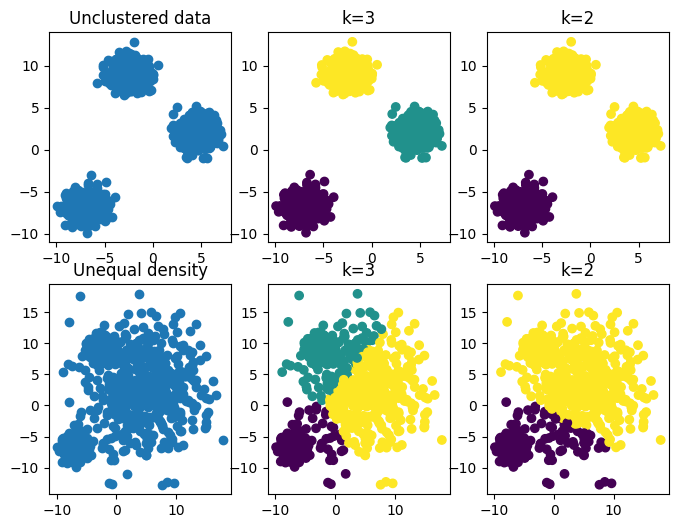

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(8, 6))

# make artificial data
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Unlabeled data
plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Unclustered data")

# Correct number of clusters
#  Note we are doing three steps (instantiate, fit, predict)
y_pred = KMeans(n_clusters=3, random_state=random_state, n_init=1).fit_predict(X)
plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k=3")

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state, n_init=1).fit_predict(X)
plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k=2")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 5.0, 1.0],
                                random_state=random_state)

plt.subplot(234)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.title("Unequal density")

y_pred = KMeans(n_clusters=3, random_state=random_state, n_init=1).fit_predict(X_varied)
plt.subplot(235)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("k=3")

y_pred = KMeans(n_clusters=2, random_state=random_state, n_init=1).fit_predict(X_varied)
plt.subplot(236)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("k=2")

plt.show()

##Implementing Kmeans Classifier using TF-IDF.

Given text documents, we can group them automatically: text classification. We’ll use KMeans which is an unsupervised machine learning algorithm. 

1. Creating a kmeans classifier using TF-IDF in Python
2. Doing a text prediction on kmeans classifier using TF-IDF

---

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
cluster = {}
for i in range(true_k):
  print("Cluster %d:" % i)
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print('-'*80)

print("\n")
print("Prediction")

T1 = ["chrome browser to open."]
Y = vectorizer.transform(T1)
prediction = model.predict(Y)
print(prediction, T1)

T2 = ["My cat is hungry."]
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction, T2)

Top terms per cluster:
Cluster 0:
 eating
 kitty
 little
 came
 restaurant
 play
 ve
 feedback
 face
 extension
--------------------------------------------------------------------------------
Cluster 1:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
--------------------------------------------------------------------------------
Cluster 2:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome
--------------------------------------------------------------------------------


Prediction
[2] ['chrome browser to open.']
[1] ['My cat is hungry.']
